# Lab 02.2

## Overview

* Run the first Jupyter notebooks in Qiskit

### Depends On

* 01-setup, 02-install-qiskit, 03-prepare

### Run time

15 min

### STEP 1. Create your first quantum circuit

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
qc_output = QuantumCircuit(8)

### STEP 2. Measure the circuit

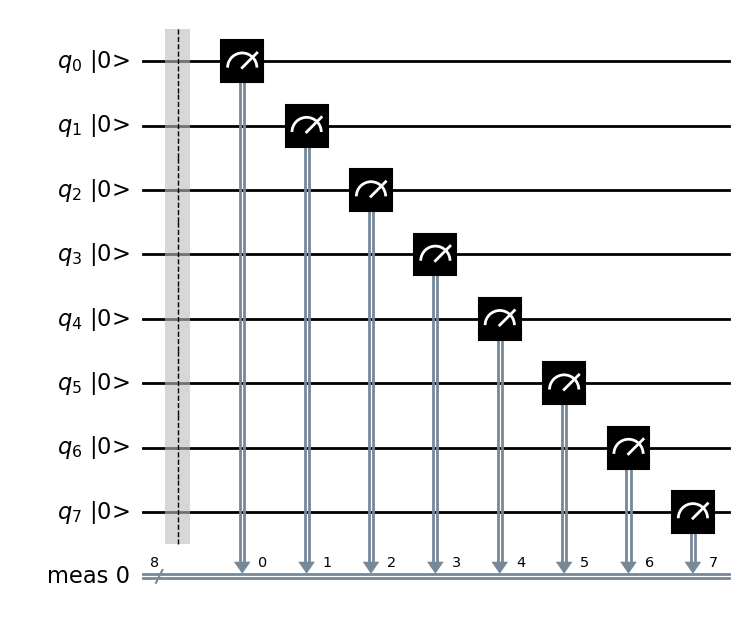

In [3]:
qc_output.measure_all()
qc_output.draw(initial_state=True)

### STEP 3. Import Qiskit simulator

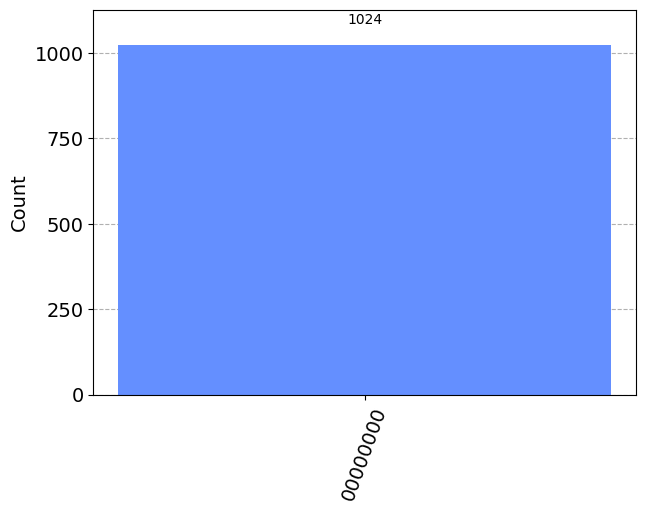

In [4]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

### STEP 4. Encoding an input

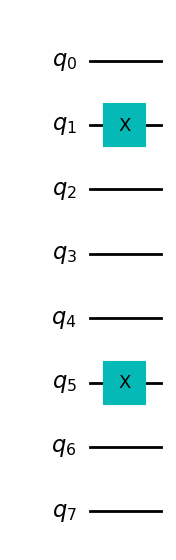

In [5]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

### STEP 5. Simulate our circuit to see the results

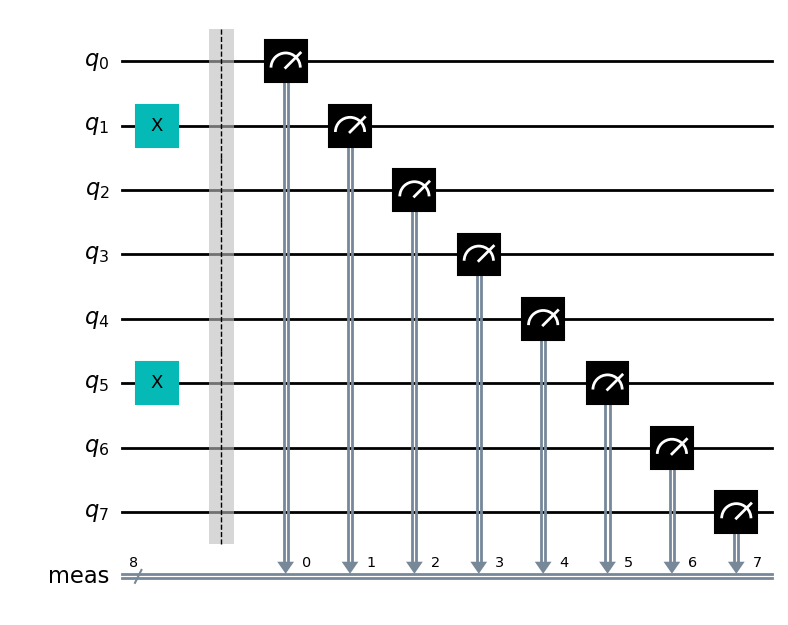

In [6]:
qc_encode.measure_all()
qc_encode.draw()

### STEP 6. Use the .cx() method to add a CNOT to our circuit

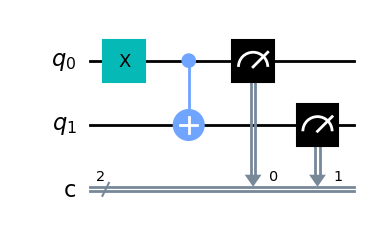

In [7]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

### STEP 7. Create another circuit

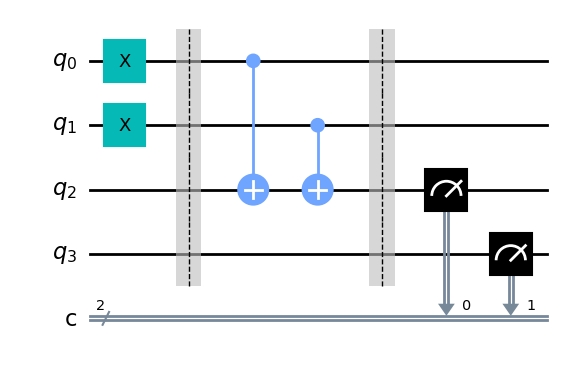

In [8]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

### STEP 8. With Tofolli gate

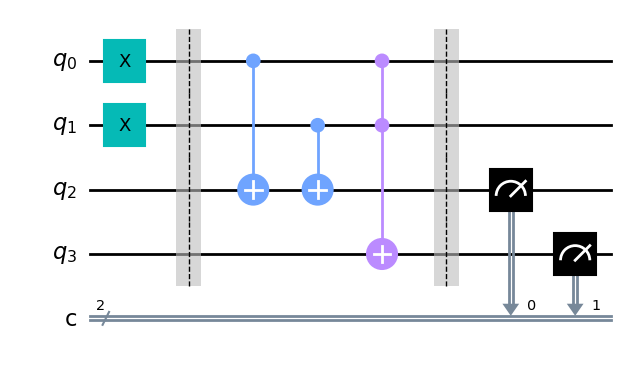

In [9]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

### STEP 9. Now calculate 1+1

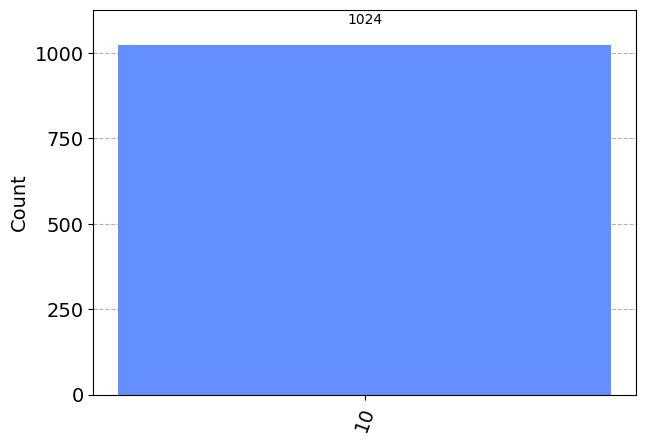

In [10]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

### STEP 10. Document the versions

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table